<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex07_Binary_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 07 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [115]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from dfply import *  # handy module to mimic R dplyr library

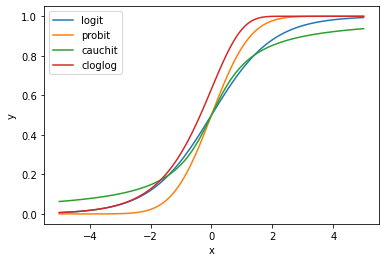

In [42]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
plt.show()


## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [70]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [76]:
titanic_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
858,3.0,"Hee, Mr. Ling",male,NaN,0.0,0.0,1601,56.4958,None,S,C,NaN,None,1
910,3.0,"Kallio, Mr. Nikolai Erland",male,17.0,0.0,0.0,STON/O 2. 3101274,7.1250,None,S,None,NaN,None,0
721,3.0,"Coleff, Mr. Peju",male,36.0,0.0,0.0,349210,7.4958,None,S,None,NaN,"Bulgaria Chicago, IL",0
228,1.0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1.0,0.0,PC 17758,108.9000,C65,C,None,NaN,"Madrid, Spain",0
11,1.0,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1.0,0.0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,3.0,"Smiljanic, Mr. Mile",male,NaN,0.0,0.0,315037,8.6625,None,S,None,NaN,None,0
1206,3.0,"Skoog, Master. Harald",male,4.0,3.0,2.0,347088,27.9000,None,S,None,NaN,None,0
452,2.0,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1.0,0.0,26707,26.0000,None,S,10,NaN,"England / Sacramento, CA",1
562,2.0,"Slayter, Miss. Hilda Mary",female,30.0,0.0,0.0,234818,12.3500,None,Q,13,NaN,"Halifax, NS",1


In [79]:
titanic_train.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,1047.000000,1047,1047,841.000000,1047.000000,1047.000000,1047,1046.000000,243,1045,392,101.000000,603,1047
unique,NaN,1046,2,NaN,NaN,NaN,768,NaN,164,3,27,NaN,320,2
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,15,NaN,"New York, NY",0
freq,NaN,2,678,NaN,NaN,NaN,8,NaN,6,749,31,NaN,46,647
mean,2.278892,NaN,NaN,29.801328,0.489016,0.390640,NaN,33.945224,NaN,NaN,NaN,163.514851,NaN,NaN
std,0.841425,NaN,NaN,14.352750,1.034595,0.845203,NaN,51.945820,NaN,NaN,NaN,97.070141,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,81.000000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN,NaN,166.000000,NaN,NaN
75%,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,258.000000,NaN,NaN


In [80]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,205.000000,262.000000,262.000000,262,262.000000,52,262,94,20.000000,142,262
unique,NaN,262,2,NaN,NaN,NaN,243,NaN,50,3,20,NaN,108,2
top,NaN,"O'Brien, Mrs. Thomas (Johanna 'Hannah' Godfrey)",male,NaN,NaN,NaN,382652,NaN,D,S,3,NaN,"New York, NY",0
freq,NaN,1,165,NaN,NaN,NaN,5,NaN,2,165,10,NaN,18,162
mean,2.358779,NaN,NaN,30.208537,0.538168,0.362595,NaN,30.701462,NaN,NaN,NaN,147.150000,NaN,NaN
std,0.821817,NaN,NaN,14.691125,1.070536,0.943933,NaN,51.020282,NaN,NaN,NaN,102.245975,NaN,NaN
min,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,22.000000,NaN,NaN
25%,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,63.750000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.458350,NaN,NaN,NaN,127.000000,NaN,NaN
75%,3.000000,NaN,NaN,40.000000,1.000000,0.000000,NaN,27.862500,NaN,NaN,NaN,204.250000,NaN,NaN


In [85]:
# Number of NA's
print(titanic_train.isna().sum())
titanic_test.isna().sum()

pclass         0
name           0
sex            0
age          206
sibsp          0
parch          0
ticket         0
fare           1
cabin        804
embarked       2
boat         655
body         946
home.dest    444
survived       0
dtype: int64


pclass         0
name           0
sex            0
age           57
sibsp          0
parch          0
ticket         0
fare           0
cabin        210
embarked       0
boat         168
body         242
home.dest    120
survived       0
dtype: int64

We will modify train dataset for our academic purpose :-)

### Model where all covariates are discrete

for categorical data in pandas see https://pandas.pydata.org/docs/user_guide/categorical.html

In [117]:
data_dis = titanic_train[['survived','pclass','sex','embarked']]

# or use dfply module
#data_dis = titanic_train >> select(titanic_train.survived, titanic_train.pclass, titanic_train.sex,
#                                   titanic_train.embarked)
print(data_dis.dtypes)

# dfply does not have mutate_if func  just mutate :(
data_dis2 = data_dis.apply(lambda x: x.astype('category') if str(data_dis['pclass'].dtype) == 'str' else x)
print(data_dis2.dtypes)

data_dis.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

data_dis = data_dis >>
  filter(Embarked %in% c("C","Q","S")) >>
  transmute(survived = data_dis.survived.astype('category'),
            #survived = Survived,
            class = as.factor(Pclass),
            sex = as.factor(Sex),
            embarked = as.factor(Embarked))

data_dis.describe(include='all')

SyntaxError: invalid syntax (<ipython-input-117-581ca20bb54a>, line 9)

In [119]:
# or use dfply module
data_dis = titanic_train >> select(titanic_train.survived, titanic_train.pclass, titanic_train.sex,
                                   titanic_train.embarked)
data_dis

,survived,pclass,sex,embarked
858,1,3.0,male,S
910,0,3.0,male,S
721,0,3.0,male,S
228,0,1.0,male,C
11,1,1.0,female,C
...,...,...,...,...
1214,0,3.0,male,S
1206,0,3.0,male,S
452,1,2.0,female,S
562,1,2.0,female,Q


In [113]:
data_dis['embarked']
df.loc[df['column_name'].isin(some_values)]

858     S
910     S
721     S
228     C
11      C
       ..
1214    S
1206    S
452     S
562     Q
571     S
Name: embarked, Length: 1047, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [93]:
data_dis = titanic_train[['survived','pclass','sex','embarked']]

In [110]:
str(data_dis['pclass'].dtype)

'float64'

In [112]:
data_dis2 = data_dis.apply(lambda x: x.astype('category') if str(data_dis['pclass'].dtype) == 'str' else x)
data_dis2.dtypes

survived    category
pclass       float64
sex         category
embarked    category
dtype: object

In [108]:
data_dis2['pclass']

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


858     3.0
910     3.0
721     3.0
228     1.0
11      1.0
       ... 
1214    3.0
1206    3.0
452     2.0
562     2.0
571     2.0
Name: pclass, Length: 1047, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

In [ ]:
install.packages("GGally")
library(GGally)
ggpairs(data_dis)

In [ ]:
table_data_dis = table(data_dis)
table_data_dis

In [ ]:
#prop.table(table_data_dis)
#prop.table(table_data_dis,margin=2)*100
table(data_dis$survived,data_dis$class)
prop.table(table(data_dis$survived,data_dis$class),margin=1)*100
prop.table(table(data_dis$survived,data_dis$class),margin=2)*100


In [ ]:
# Count observations
table(data_dis$survived,data_dis$sex)
# Conditional proportions given columns
prop.table(table(data_dis$survived,data_dis$sex),margin=2)*100
# Conditional proportions given rows
prop.table(table(data_dis$survived,data_dis$sex),margin=1)*100

In [ ]:

table(data_dis$survived,data_dis$embarked)
prop.table(table(data_dis$survived,data_dis$embarked),margin=2)*100
? prop.table


In [ ]:
# Odss ratio (empirický poměr šancí)
OR        = function(tab){tab[1,1]/tab[1,2]/(tab[2,1]/tab[2,2])}
table_sex = table(data_dis$survived,data_dis$sex)
table_sex
OR(table_sex)
# Men have 

In [ ]:
#install.packages("mosaic")
#library(mosaic)
#oddsRatio(table_sex, verbose = TRUE)

In [ ]:
install.packages("epitools")
library(epitools)
oddsratio.wald(table_sex, conf.level = 0.95)

In [ ]:
chisq.test(table_sex)

### Null model

* Compute the null model (assume that the probability of survival was the same for all passangers)

* How do we interpret estimated parameter?

In [ ]:
mod0=glm(survived~1,family=binomial(link = "logit"),data_dis) #
summary(mod0)

In [ ]:
# The chances of survival according to training data.
exp(coef(mod0))

# The probability of survival.
exp(coef(mod0))/(1+exp(coef(mod0)))


### Model with variable: sex

* Compute the model with one covariate sex. 

* How can we interpret estiamted coefficients? 

* Did survival depend on gender (`sex`) ?

* Perform an appropriate tests.

* Did women have a better chance of survival? 


In [ ]:
mod_sex=glm(survived~sex,family=binomial(link = "logit"),data_dis) #
summary(mod_sex)

Use deviance to test submodels `anova(model_1,model_2,test="Chisq")`.

In [ ]:
# The chances of survival according to training data.
exp(coef(mod_sex))
#sexmale:    0.081668331668578
anova(mod_sex,mod0,test="Chisq")


In [ ]:
#Function to estimate OR with lower and upper limit of 95% CI for OR
OR_coef = function(variable,model,CI){
  param = coef(model)
  where = grep(variable,names(param))[1]
  beta  = param[where]
  se = summary(model)$coef[where,2]
  or = exp(beta)
  ci = exp(beta+c(-1,1)*qnorm(CI/2+0.5)*se)
  out = data.frame(or,ci[1],ci[2])
  names(out) = c("OR","LCL","UCL")
  out
}
OR_coef("sex",mod_sex,0.95)

Compare with results obtained from contingency table.

### Your turn:

Estimate model with one covariate `class` and compute: 

1. Did survival depend on (`class`) ?

2. Perform an appropriate tests.

3. Compute odds ratios between classes.

4. Did passangers in second class have a better chance of survival than in third? 


In [ ]:
#1. 

In [ ]:
#2. 

In [ ]:
#3.

In [ ]:
#4.

### Model with all discrete covariates without interactions

In [ ]:
# Simple Logistic Regression model with all discrete covariates without interactions
mod1=glm(survived~.,family=binomial(link = "logit"),data_dis) #
summary(mod1)

Deviance tests to add/drop independent variables.

`drop1(model,test="Chisq")`

`add1(model,terms.to.add,test="Chisq")`

In [ ]:
drop1(mod1,test="Chisq")


In [ ]:
add1(mod0,survived~sex+class+embarked, test="Chisq")


In [ ]:
data_dis2 = mutate(data_dis, embarked = fct_recode(embarked, "Q" = "C"))
str(data_dis2)

mod1=glm(survived~.,family=binomial(link = "logit"),data_dis2) #
summary(mod1)

In [ ]:
#mod1=glm(survived~relevel(factor(sex),ref="male")+class+embarked,family=binomial(link = "logit"),data_dis2) 
#summary(mod1)



In [ ]:
OR_coef("sex",mod1,0.95)

Interpret previous result:

* By how many percentage is the chance of survival lower for  men? 

* Interpret confidence intrval and its significance.


Lets try model with second order interactions.


In [ ]:
add1(mod1,~.^2,test="Chisq")

In [ ]:
mod2_all = glm(survived~(.)^2,family=binomial(link = "logit"),data_dis) #
summary(mod2_all)


In [ ]:
step(mod2_all)

In [ ]:
mod2 = glm(survived~ class + sex + embarked + class:sex + sex:embarked,family=binomial(link = "logit"),data_dis) #
summary(mod2)

In [ ]:
anova(mod2_all,mod2,test="Chisq")

Interpretation by OR in models with interactions is more complitacated, see Lecture notes.

Lets try model with merged factor levels.




In [ ]:
data_dis3 = mutate(data_dis2, class = fct_recode(class, "2" = "1"))
str(data_dis3)

In [ ]:
mod2 = glm(survived~ class + sex + embarked + class:sex + sex:embarked,family=binomial(link = "logit"),data_dis3) #
summary(mod2)

In [ ]:
mod3 = glm(survived~ (.)^2,family=binomial(link = "logit"),data_dis3) #
anova(mod2,mod3,test="Chisq")


## Model with continuous independent variable.


Discuss difference from models without continuous variable (again)!!!

In [ ]:
str(titanic_train)

In [ ]:
data_con = titanic_train %>%
  dplyr::select(Survived,Pclass,Sex,Embarked,Age,Fare)

data_con %>% mutate_if(is.character,as.factor) %>% summary()

data_con = data_con %>%
  filter(Embarked %in% c("C","Q","S")) %>%
  transmute(survived = as.factor(Survived),
            #survived = Survived,
            class = as.factor(Pclass),
            sex = as.factor(Sex),
            embarked = as.factor(Embarked),
            age = Age,
            fare = Fare) %>%
  drop_na()          

summary(data_con)           
str(data_con)

In [ ]:
ggpairs(data_con  %>% dplyr::select(survived,age,fare,class))

In [ ]:
ggplot(data_con, aes(x=sex, y=age, fill = survived)) + 
  geom_boxplot()+
  labs(title="Gender boxplot",x="Gender", y = "Age")+
  #geom_jitter(shape=16, position=position_jitter(0.2)) +
  stat_summary(fun=mean, geom="point", shape=23, size=3) +
  theme_classic()

In [ ]:
ggplot(data_con, aes(x=class, y=fare, fill = survived)) + 
  geom_boxplot()+
  labs(title="Class x Fare",x="Class", y = "Fare")+
  #geom_jitter(shape=16, position=position_jitter(0.2)) +
  stat_summary(fun=mean, geom="point", shape=23, size=3) +
  theme_classic()

Continuous variable as factor

In [ ]:
data_con_fac = data_con %>%
  mutate(age = cut(age,
                    breaks=c(-Inf, 15, 50, Inf), 
                    labels=c("child","adult","senior")))
ggpairs(data_con_fac)

In [ ]:
mod_0 = glm(survived ~ 1, family = binomial,data = data_con_fac )

In [ ]:
mod_age_fac = glm(survived ~ age, family = binomial,data = data_con_fac )
summary(mod_age_fac)
exp(coef(mod_age_fac))

Is the chance decreasing with increasing age?

In [ ]:
anova(mod_age_fac,mod_0,test="Chisq")

In [ ]:
mod_age = glm(survived ~ I(age/10), family = binomial,data = data_con )
summary(mod_age)
exp(coef(mod_age))

Question:

* With increasing age by 10 years, chance to survive decreased by 11%. 

* What do you think about causality in this result?

In [ ]:
anova(mod_age,mod_0,test="Chisq")

Question:

* Can we compare by deviance test models `mod_age` and `mod_age_fac`?
* Which model do you prefere and why?
* For which approach (factorized or continuous) saturated model is useful and why?


In [ ]:
#mod_sat_fac = glm(survived ~ sex*age*embarked*class, family = binomial,data = (data_con %>% mutate(age= as.factor(age), fare = as.factor(fare)) ))
#summary(mod_sat_fac)

Your turn:

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `child`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare`, where each level break is by 10 pounds.
* Estimate a model, where the chance of survival depends on factorized `fare` and `sex` and `child`.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

Next Exercises (8 and 9):

* Logistic regression and binary classification (ROC, accuracy, ...)
* Residual analysis
* Prediction and confidence intervals
* Logistic regression and ML approach

